<a href="https://colab.research.google.com/github/PurdueCho/Colab/blob/master/g_10_%EB%B2%94%EC%A3%BC%ED%98%95%EC%BD%94%EB%94%A9_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 데이터 변환

In [0]:
n_samples = 1000
height = 3*(np.random.randn(n_samples)) + 170
nationality = np.random.randint(0,9,n_samples)

In [0]:
height, nationality

In [27]:
list(zip(height, nationality))

[(173.8044522368801, 4),
 (169.81103284757984, 0),
 (165.25177639829192, 6),
 (168.4018040457599, 3),
 (170.43976736528418, 3),
 (167.02215738670304, 4),
 (167.98604070210416, 1),
 (170.3506948668297, 3),
 (167.99505875786284, 2),
 (167.67537158021705, 1),
 (170.1376117367668, 1),
 (166.54583933848136, 5),
 (169.66640833659304, 7),
 (163.3390599390341, 6),
 (171.0364279439682, 4),
 (168.07103026635858, 6),
 (168.71005373153275, 0),
 (165.8844503235094, 4),
 (169.73127598272177, 8),
 (170.3942033483662, 6),
 (171.2355822333854, 5),
 (170.20515488587085, 3),
 (168.7309944697469, 8),
 (173.346310886601, 5),
 (169.5772519953385, 0),
 (170.47054194467086, 7),
 (167.1206678209393, 2),
 (174.09450701676735, 8),
 (171.6475905892115, 6),
 (167.869330999529, 4),
 (171.87098969860497, 3),
 (173.96198172677154, 8),
 (166.7901691373711, 6),
 (172.5965206855609, 8),
 (167.804942693892, 3),
 (164.56353003875725, 3),
 (164.4345808622327, 8),
 (173.0137436973813, 6),
 (171.0903380474469, 0),
 (168.7201

In [28]:
df = pd.DataFrame(list(zip(height, nationality)), 
                  columns=["height","nationality"])
df.head()

,height,nationality
0,173.804452,4
1,169.811033,0
2,165.251776,6
3,168.401804,3
4,170.439767,3


In [0]:
nat = pd.get_dummies(df['nationality'], prefix='nat_')

In [30]:
nat   # One hot encoding

,nat__0,nat__1,nat__2,nat__3,nat__4,nat__5,nat__6,nat__7,nat__8
0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,0,0
996,0,0,0,0,0,0,1,0,0
997,0,0,0,0,1,0,0,0,0
998,0,0,0,0,0,0,0,1,0


In [31]:
new_df = pd.concat([df, nat], axis=1); new_df.head()

,height,nationality,nat__0,nat__1,nat__2,nat__3,nat__4,nat__5,nat__6,nat__7,nat__8
0,173.804452,4,0,0,0,0,1,0,0,0,0
1,169.811033,0,1,0,0,0,0,0,0,0,0
2,165.251776,6,0,0,0,0,0,0,1,0,0
3,168.401804,3,0,0,0,1,0,0,0,0,0
4,170.439767,3,0,0,0,1,0,0,0,0,0


In [0]:
new_df.drop('nationality', axis=1, inplace=True)

In [33]:
new_df

,height,nat__0,nat__1,nat__2,nat__3,nat__4,nat__5,nat__6,nat__7,nat__8
0,173.804452,0,0,0,0,1,0,0,0,0
1,169.811033,1,0,0,0,0,0,0,0,0
2,165.251776,0,0,0,0,0,0,1,0,0
3,168.401804,0,0,0,1,0,0,0,0,0
4,170.439767,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,172.905123,0,0,0,0,1,0,0,0,0
996,168.626140,0,0,0,0,0,0,1,0,0
997,170.091435,0,0,0,0,1,0,0,0,0
998,173.931514,0,0,0,0,0,0,0,1,0


In [34]:
nationality

array([4, 0, 6, 3, 3, 4, 1, 3, 2, 1, 1, 5, 7, 6, 4, 6, 0, 4, 8, 6, 5, 3,
       8, 5, 0, 7, 2, 8, 6, 4, 3, 8, 6, 8, 3, 3, 8, 6, 0, 1, 7, 0, 6, 2,
       1, 8, 7, 5, 4, 6, 5, 7, 3, 2, 0, 1, 2, 0, 4, 0, 2, 3, 2, 1, 0, 5,
       1, 3, 0, 1, 3, 1, 6, 3, 1, 6, 4, 7, 5, 0, 3, 8, 0, 3, 6, 8, 7, 8,
       0, 4, 7, 5, 0, 6, 0, 7, 8, 4, 4, 1, 4, 1, 6, 6, 6, 1, 7, 1, 0, 8,
       7, 6, 0, 7, 6, 8, 1, 8, 7, 6, 3, 0, 2, 8, 6, 5, 6, 4, 0, 5, 2, 4,
       2, 7, 4, 5, 1, 1, 5, 3, 0, 7, 1, 8, 3, 7, 3, 2, 4, 5, 8, 6, 3, 4,
       5, 2, 5, 2, 6, 2, 6, 8, 5, 0, 7, 3, 1, 3, 8, 6, 7, 0, 1, 4, 1, 0,
       0, 3, 6, 0, 8, 4, 3, 0, 8, 4, 4, 0, 1, 3, 5, 0, 4, 1, 5, 6, 1, 7,
       6, 2, 8, 7, 0, 3, 2, 3, 0, 7, 0, 8, 8, 2, 4, 1, 8, 4, 7, 1, 6, 0,
       0, 0, 1, 8, 3, 3, 5, 5, 5, 2, 5, 4, 0, 5, 1, 5, 1, 0, 5, 1, 7, 6,
       0, 5, 0, 7, 3, 5, 3, 8, 2, 3, 0, 6, 7, 1, 0, 8, 4, 8, 5, 0, 5, 4,
       4, 1, 1, 3, 8, 5, 4, 2, 1, 0, 1, 7, 5, 4, 7, 5, 1, 7, 0, 8, 1, 8,
       5, 3, 0, 7, 3, 1, 4, 6, 1, 2, 0, 6, 7, 2, 3,

In [35]:
nat_categ = pd.Categorical(nationality)
nat_categ

[4, 0, 6, 3, 3, ..., 4, 6, 4, 7, 8]
Length: 1000
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]

In [0]:
# 주의: Series로 변경된다
df['categ'] = nat_categ

In [37]:
df

,height,nationality,categ
0,173.804452,4,4
1,169.811033,0,0
2,165.251776,6,6
3,168.401804,3,3
4,170.439767,3,3
...,...,...,...
995,172.905123,4,4
996,168.626140,6,6
997,170.091435,4,4
998,173.931514,7,7


In [38]:
type(df.categ)

pandas.core.series.Series

In [0]:
type(nat_categ)

pandas.core.arrays.categorical.Categorical

# 스케일링
## 표준 스케일링

In [39]:
height = 3*np.random.randn(n_samples).round() + 170
weight = 4*np.random.randn(n_samples).round() + 70

X = pd.DataFrame(list(zip(height, weight)));X.head()

,0,1
0,170.0,74.0
1,173.0,70.0
2,170.0,70.0
3,170.0,70.0
4,167.0,74.0


In [46]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X) 
X_std     #표준편차

array([[-0.03016628,  0.97716212],
       [ 0.94293943,  0.01916004],
       [-0.03016628,  0.01916004],
       ...,
       [ 0.94293943,  0.01916004],
       [-1.00327199, -0.93884204],
       [ 0.94293943,  0.01916004]])

In [48]:
x=X.values
x

array([[170.,  74.],
       [173.,  70.],
       [170.,  70.],
       ...,
       [173.,  70.],
       [167.,  66.],
       [173.,  70.]])

In [49]:
x_std = StandardScaler().fit_transform(x);x_std

array([[-0.03016628,  0.97716212],
       [ 0.94293943,  0.01916004],
       [-0.03016628,  0.01916004],
       ...,
       [ 0.94293943,  0.01916004],
       [-1.00327199, -0.93884204],
       [ 0.94293943,  0.01916004]])

## 확률 분포

In [0]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

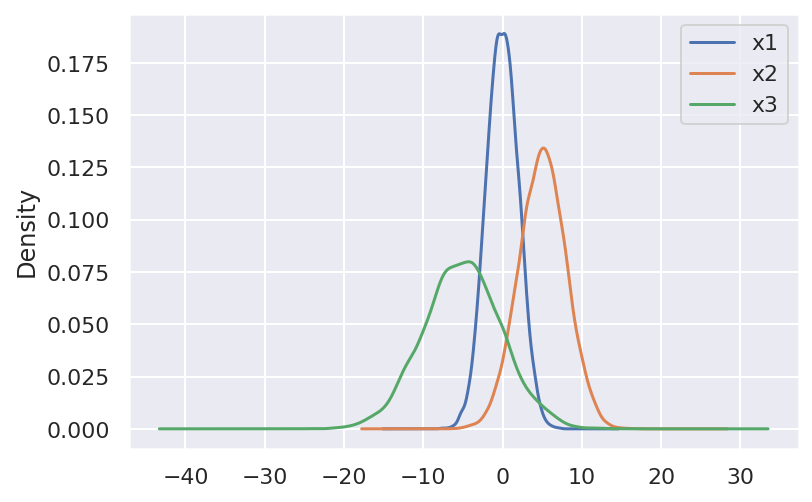

In [51]:
# plotting data

df.plot.kde()

In [0]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

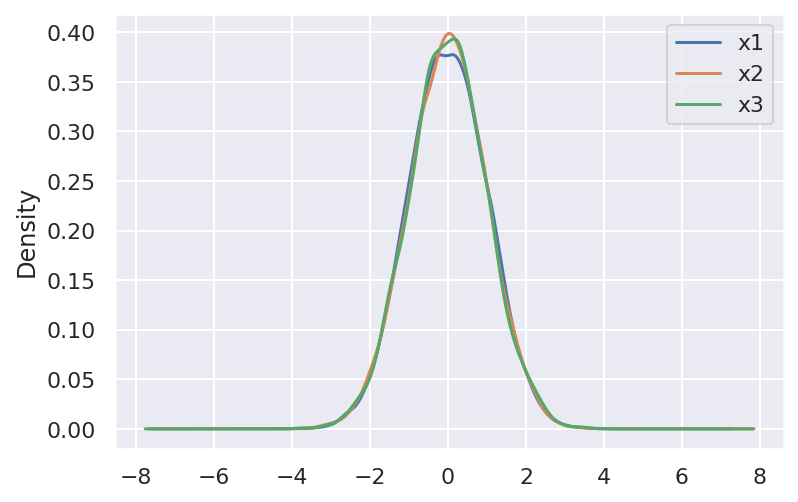

In [53]:
df.plot.kde()

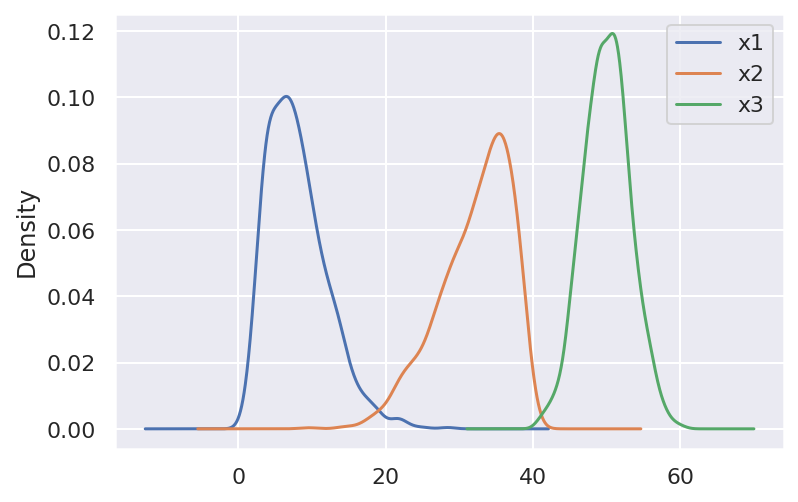

In [54]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

df.plot.kde()

In [0]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

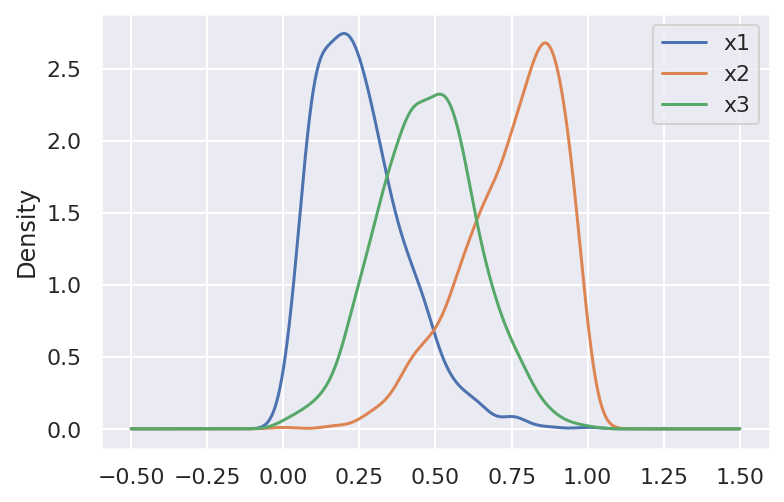

In [56]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

In [0]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

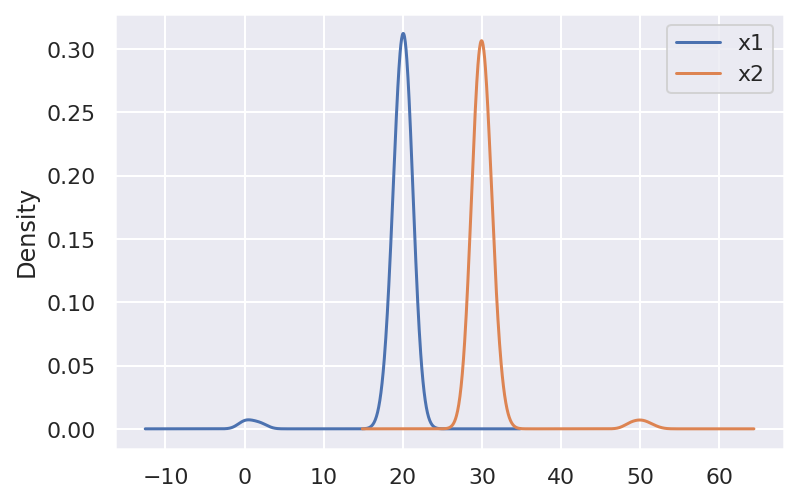

In [58]:
df.plot.kde()

In [0]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

data_tf = robustscaler.fit_transform(df)
df1 = pd.DataFrame(data_tf, columns=['x1','x2'])

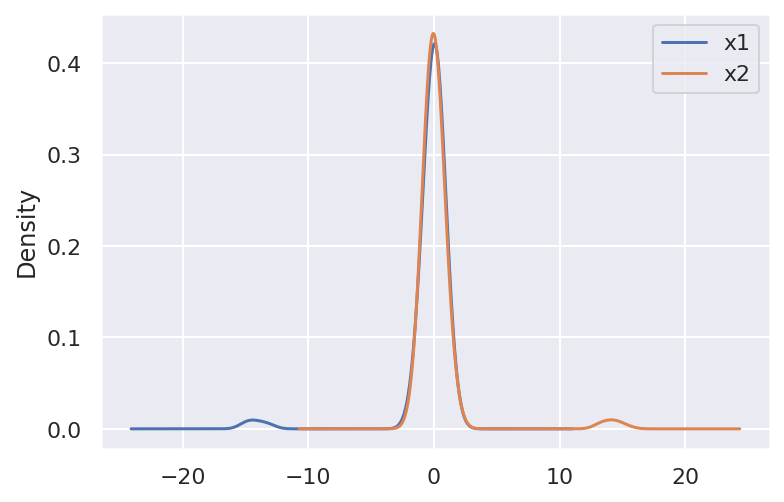

In [60]:
df1.plot.kde()

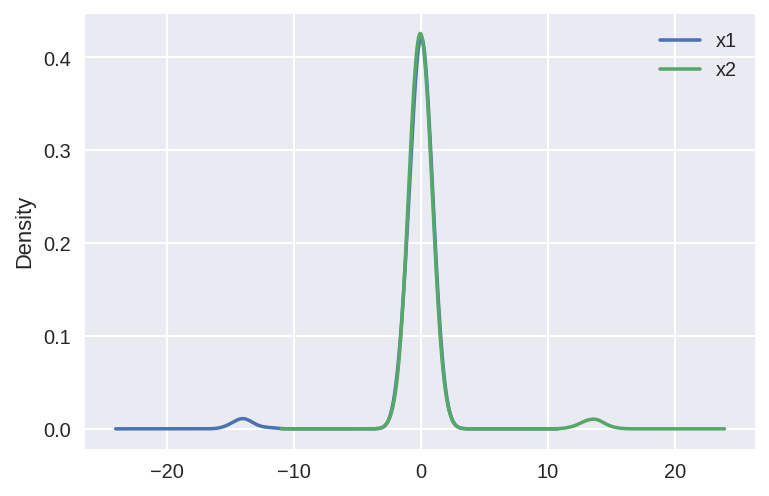

In [0]:
data_tf = standardscaler.fit_transform(df)
df2 = pd.DataFrame(data_tf, columns=['x1','x2'])

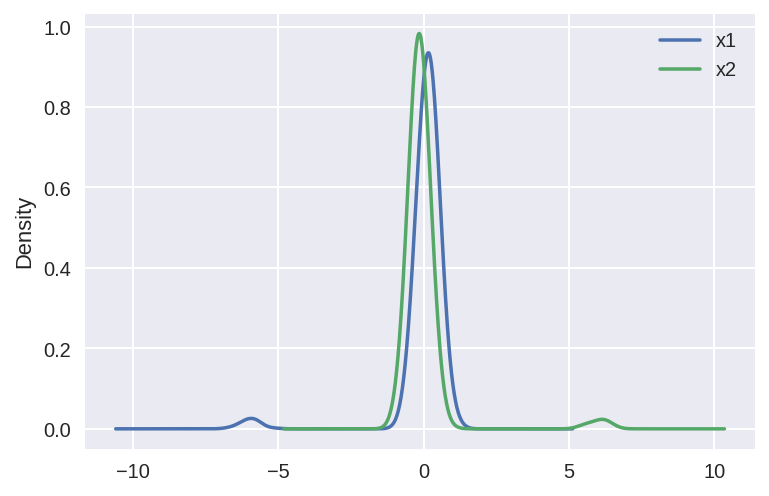

In [0]:
df2.plot.kde()

In [0]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)
df3 = pd.DataFrame(data_tf, columns=['x1','x2'])

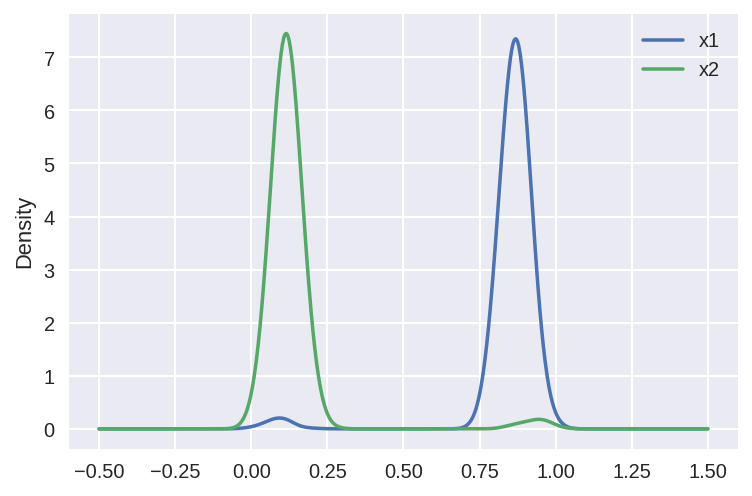

In [0]:
df3.plot.kde()